## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [27]:
## 資料前處理
import numpy as np
def preproc_x(x, flatten=True):
    x = (((x-x.min()) /(x.max()-x.min()))-0.5)*2
#     if flatten:
#         x = x.reshape((len(x), -1))
    
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [28]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [29]:
x_train.shape[1:]

(32, 32, 3)

In [38]:
"""Code Here
建立你的神經網路
"""
from keras.layers import Input, Dense, Conv2D,Dropout,MaxPooling2D,Flatten
from keras.models import Model
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]): #16
    print(input_shape)
    input_layer = Input(shape=input_shape)   
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Conv2D(n_units, 3, padding='same', activation='relu',name="hidden_layer_Conv2D"+str(i+1))(input_layer)
            x = MaxPooling2D(pool_size=(2, 2),name="hidden_layer_MaxPooling2D"+str(i+1))(x)
        else:
            print(n_units)
            x = Conv2D(n_units, 3, padding='same', activation='relu',name="hidden_layer_Conv2D"+str(i+1))(x)
            x = MaxPooling2D(pool_size=(2, 2),name="hidden_layer_MaxPooling2D"+str(i+1))(x)
            # 到32時downsample以至1,無法在加16
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(units=512, activation="relu", name="hidden_layer"+str(i+1))(x)
    x = Dropout(0.25)(x)
    out = Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

(32, 32, 3)
256
128
64
32
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
hidden_layer_Conv2D1 (Conv2D (None, 32, 32, 512)       14336     
_________________________________________________________________
hidden_layer_MaxPooling2D1 ( (None, 16, 16, 512)       0         
_________________________________________________________________
hidden_layer_Conv2D2 (Conv2D (None, 16, 16, 256)       1179904   
_________________________________________________________________
hidden_layer_MaxPooling2D2 ( (None, 8, 8, 256)         0         
_________________________________________________________________
hidden_layer_Conv2D3 (Conv2D (None, 8, 8, 128)         295040    
_________________________________________________________________
hidden_layer_MaxPooling2D3 ( (Non

In [39]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [40]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [41]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 26s 523us/step - loss: 1.7456 - accuracy: 0.3431 - val_loss: 1.3959 - val_accuracy: 0.4907
Epoch 2/100
50000/50000 [==============================] - 19s 379us/step - loss: 1.2825 - accuracy: 0.5338 - val_loss: 1.1006 - val_accuracy: 0.6022
Epoch 3/100
50000/50000 [==============================] - 19s 380us/step - loss: 1.0643 - accuracy: 0.6219 - val_loss: 1.0797 - val_accuracy: 0.6125
Epoch 4/100
50000/50000 [==============================] - 19s 381us/step - loss: 0.9138 - accuracy: 0.6784 - val_loss: 0.8845 - val_accuracy: 0.6956
Epoch 5/100
50000/50000 [==============================] - 19s 382us/step - loss: 0.8050 - accuracy: 0.7174 - val_loss: 0.8095 - val_accuracy: 0.7217
Epoch 6/100
50000/50000 [==============================] - 19s 383us/step - loss: 0.7137 - accuracy: 0.7510 - val_loss: 0.7649 - val_accuracy: 0.7348
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 19s 383us/step - loss: 0.0697 - accuracy: 0.9774 - val_loss: 1.1058 - val_accuracy: 0.7699
Epoch 56/100
50000/50000 [==============================] - 19s 383us/step - loss: 0.0597 - accuracy: 0.9806 - val_loss: 1.0663 - val_accuracy: 0.7783
Epoch 57/100
50000/50000 [==============================] - 19s 382us/step - loss: 0.0550 - accuracy: 0.9825 - val_loss: 1.0777 - val_accuracy: 0.7613
Epoch 58/100
50000/50000 [==============================] - 19s 381us/step - loss: 0.0527 - accuracy: 0.9843 - val_loss: 1.1179 - val_accuracy: 0.7668
Epoch 59/100
50000/50000 [==============================] - 19s 382us/step - loss: 0.0499 - accuracy: 0.9844 - val_loss: 1.0841 - val_accuracy: 0.7676
Epoch 60/100
50000/50000 [==============================] - 19s 382us/step - loss: 0.0606 - accuracy: 0.9810 - val_loss: 1.0488 - val_accuracy: 0.7668
Epoch 61/100
50000/50000 [==============================] - 19s 382us/step - loss: 0.0525 - ac

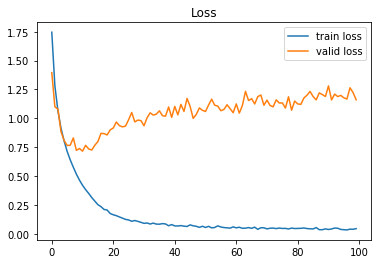

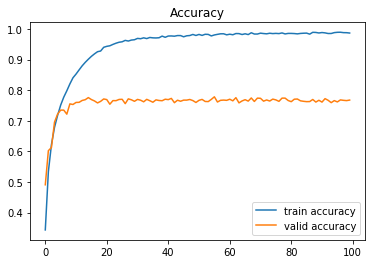

In [42]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()